# Plot the distribution of diseases

Import libraries

In [119]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import geopandas as gpd
sys.path.append(os.path.abspath('..'))
%matplotlib inline

Load map of Brazil

In [120]:
disease = "DIABETES_MELLITUS" # Atualizar aqui
gdf = gpd.read_file('../PySal/municipios/BRMUE250GC_SIR.shp')

Convert MUNCODDV to MUNCOD

In [121]:
cadmun = pd.read_csv('../util/CADMUN.csv')
cadmun = cadmun[["MUNCOD", "MUNCODDV"]]
gdf["CD_GEOCMU"] = gdf["CD_GEOCMU"].astype(int)
gdf_city = pd.merge(gdf, cadmun,  left_on="CD_GEOCMU", right_on="MUNCODDV", how="left")

Load rates file and merge with Brazil dataframe

In [122]:
df = pd.read_csv('Rates/' + disease + '_RATE_15_17.csv', sep=',')
result = pd.merge(gdf_city, df, left_on="MUNCOD", right_on="MUNCOD", how="left")
result = result[["NM_MUNICIP", "CD_GEOCMU", "geometry", "RATE"]]
result

,NM_MUNICIP,CD_GEOCMU,geometry,RATE
0,CACHOEIRA DO PIRIÁ,1501956,"POLYGON ((-46.31955 -1.75518, -46.31990 -1.755...",5.134936
1,SÃO JOSÉ DOS BASÍLIOS,2111250,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...",137.938007
2,APARECIDA DO RIO DOCE,5201454,"POLYGON ((-51.14230 -18.29672, -51.14236 -18.2...",26.560425
3,ARENÓPOLIS,5202353,"POLYGON ((-51.69953 -16.23270, -51.69957 -16.2...",133.062704
4,CURUÁ,1502855,"POLYGON ((-55.17193 -1.83331, -55.16647 -1.731...",19.468339
...,...,...,...,...
5567,PARAGUAÇU PAULISTA,3535507,"POLYGON ((-50.69420 -22.39885, -50.69410 -22.3...",63.638571
5568,ÁGUA LIMPA,5200209,"POLYGON ((-48.86197 -17.98972, -48.86111 -17.9...",101.455155
5569,SANTA CRUZ DO SUL,4316808,"POLYGON ((-52.46848 -29.70647, -52.46847 -29.7...",42.346697
5570,SAUDADES,4217303,"POLYGON ((-53.10221 -26.93414, -53.10236 -26.9...",76.388549


Plot results

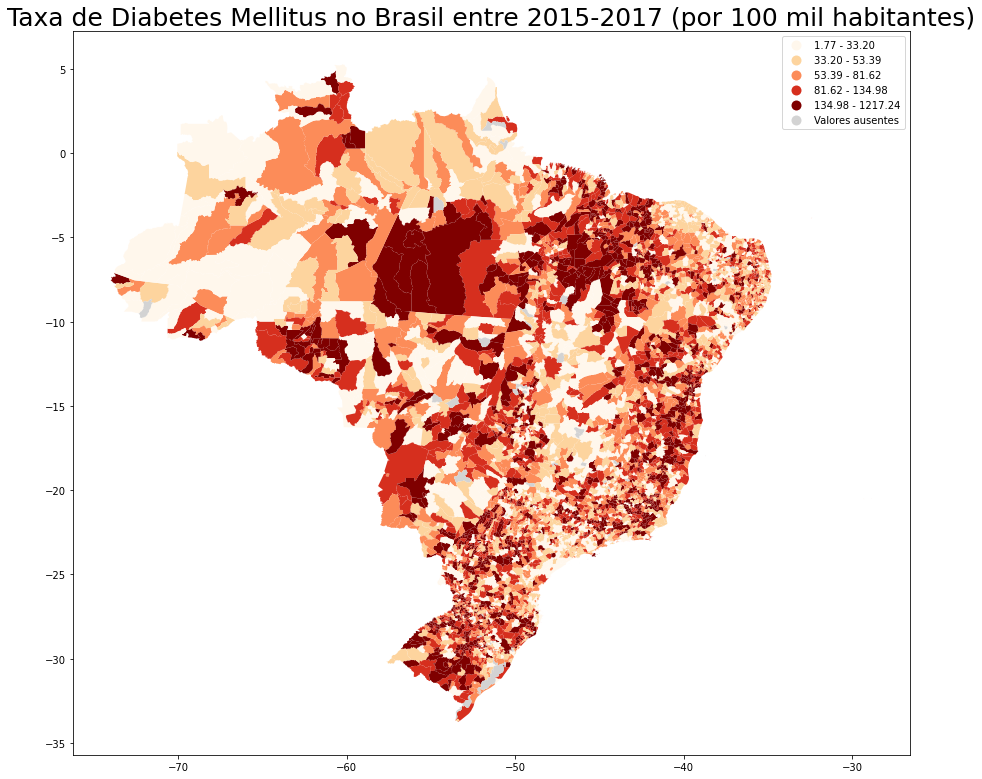

In [123]:
fig, ax = plt.subplots (figsize = (15,15))
disease_title = ' '.join([item.title() for item in disease.split('_')])
result.plot(column='RATE',
            ax=ax,
            legend=True,
            cmap='OrRd',
            scheme='quantiles',
            missing_kwds={'color': 'lightgrey', "label": "Valores ausentes"});
plt.title('Taxa de ' + disease_title + ' no Brasil entre 2015-2017 (por 100 mil habitantes)',fontsize=25)
plt.savefig('PNG/' + disease + '.png')